# Project B10: KAGGLE - Mobile Device Usage and User Behavior Dataset

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score


# Data Collection and Initial Inspection

Dataset loaded successfully.

Initial Inspection: Displaying the first 5 rows of the dataset.
   User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40

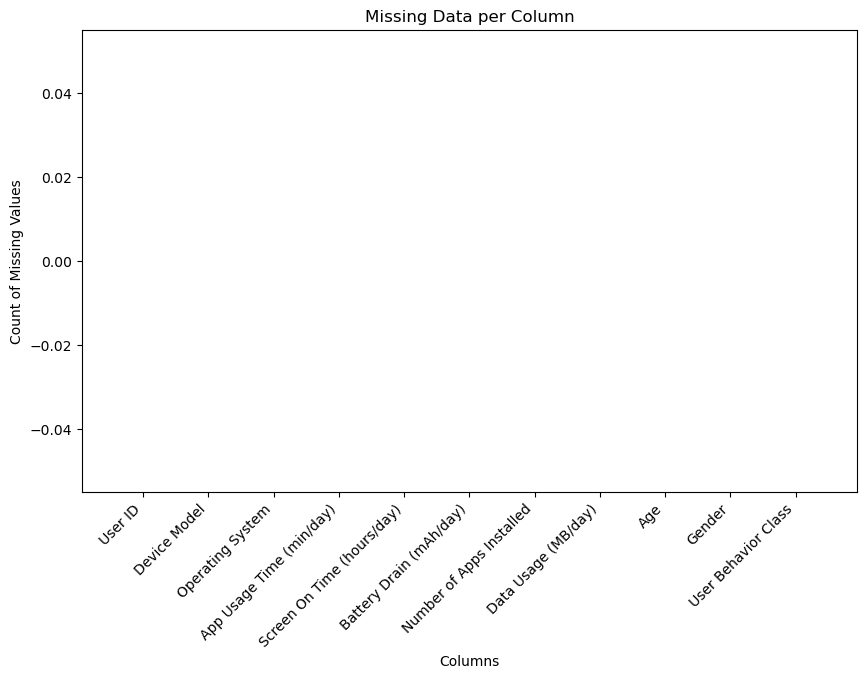


Checking for duplicate rows in the dataset.
Number of duplicate rows: 0

Visualizing distributions for numeric columns:


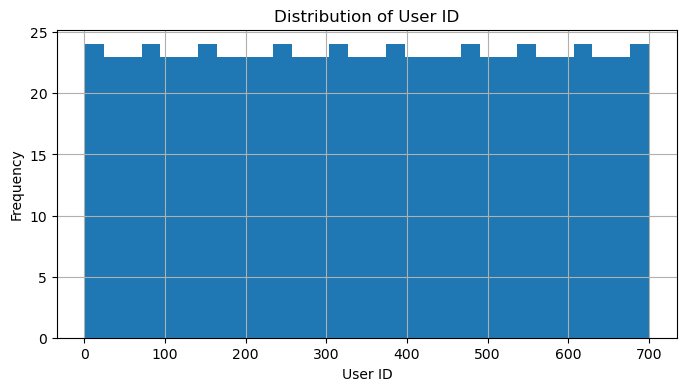

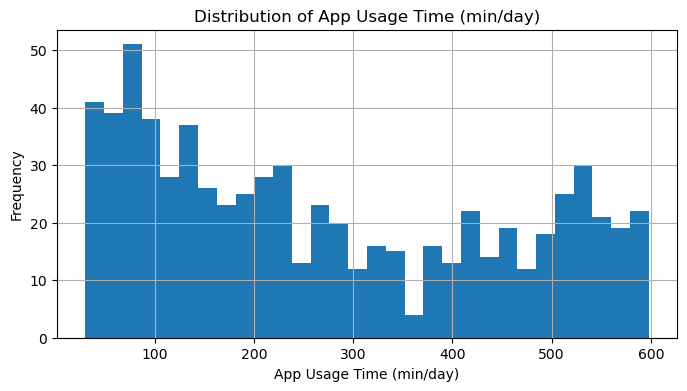

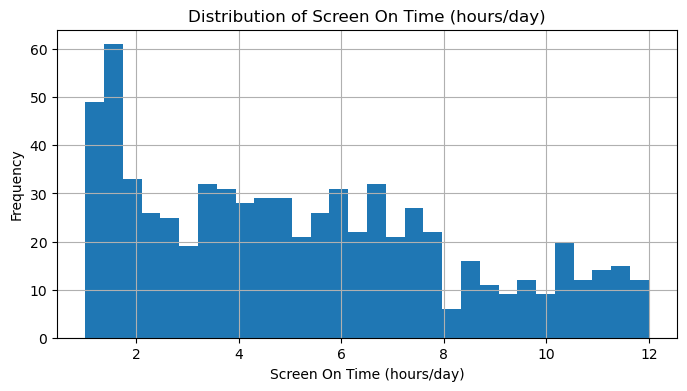

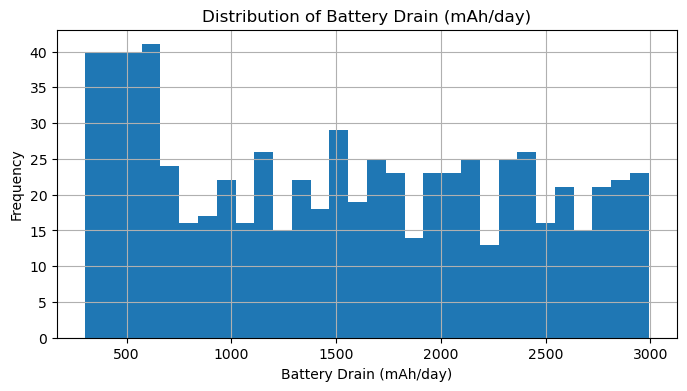

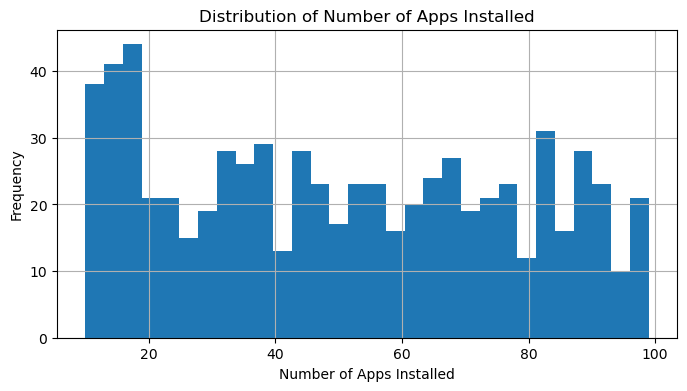

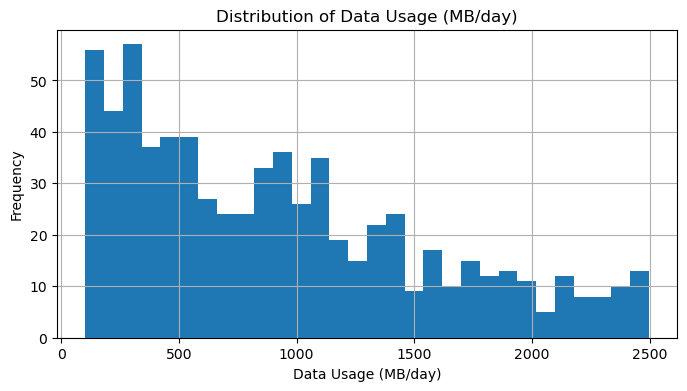

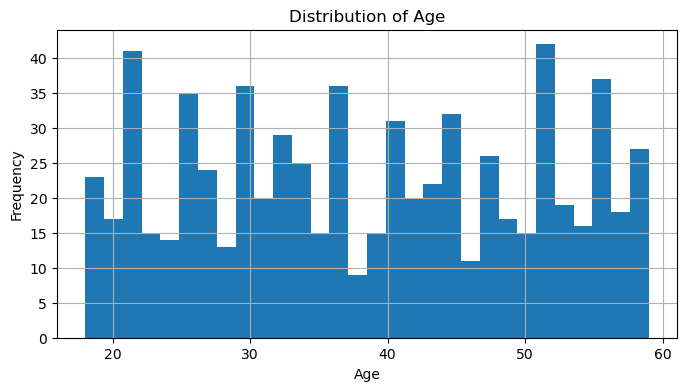

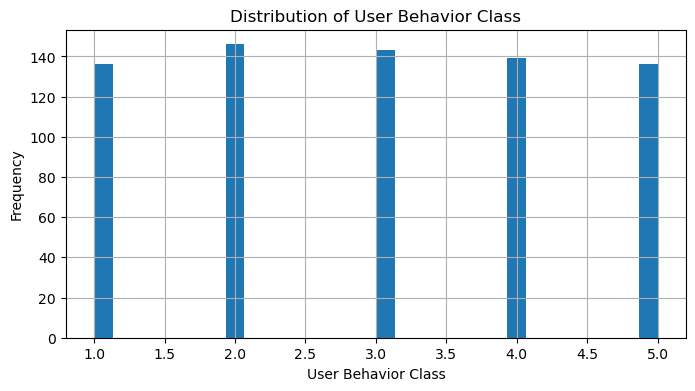


Investigating potential outliers with boxplots:


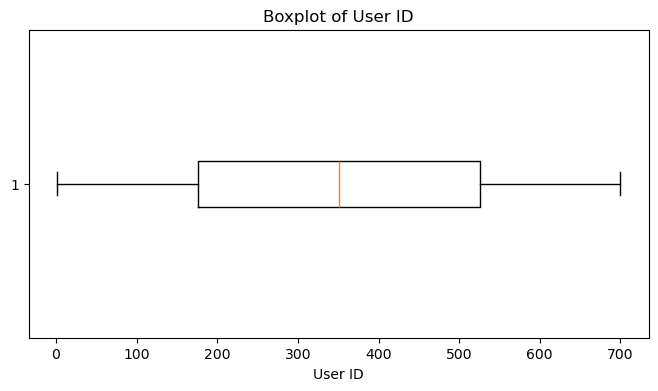

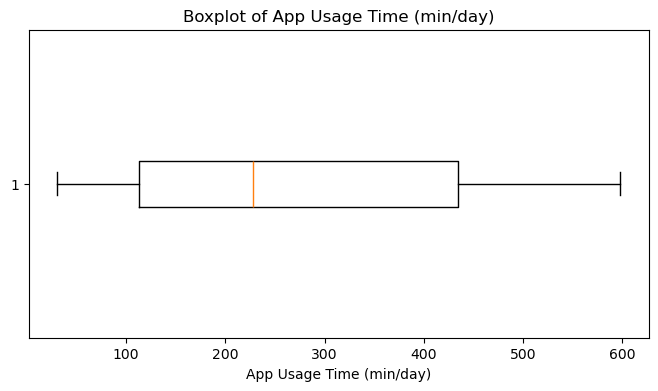

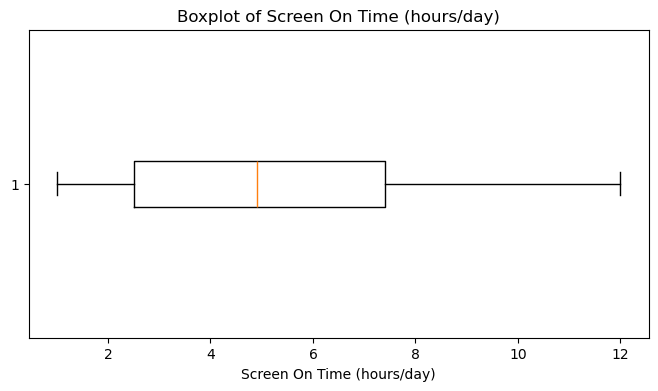

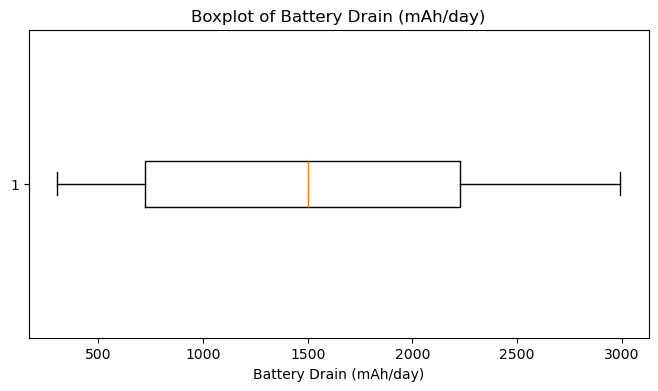

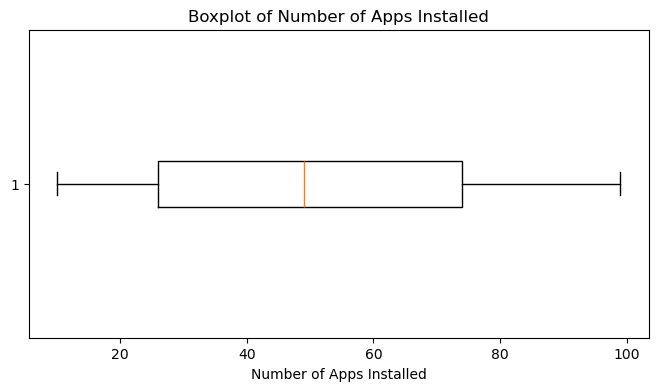

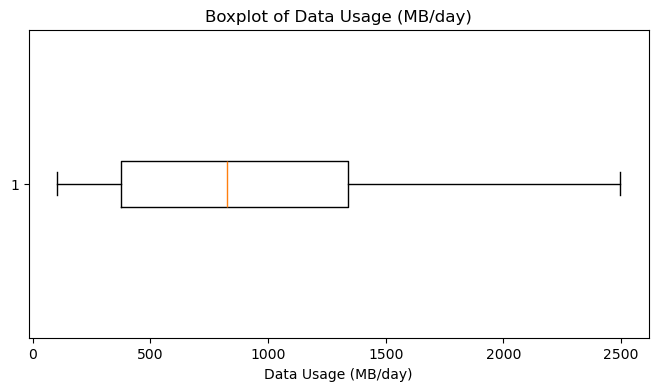

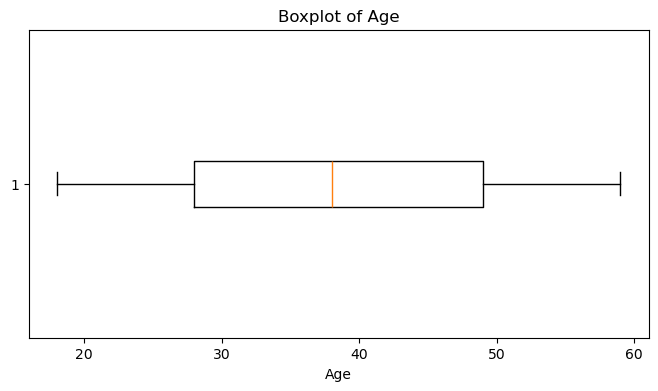

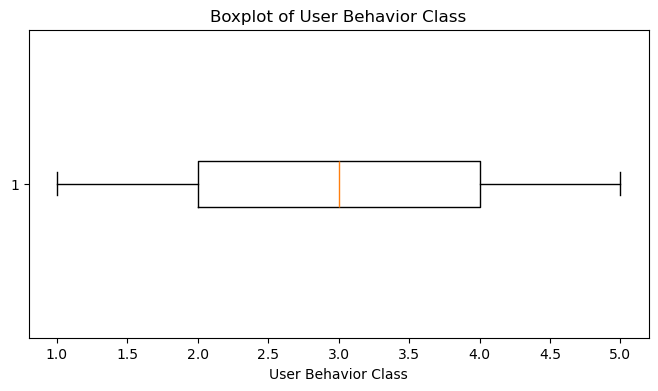


Correlation Matrix for Numeric Columns:
                             User ID  App Usage Time (min/day)  \
User ID                     1.000000                 -0.024957   
App Usage Time (min/day)   -0.024957                  1.000000   
Screen On Time (hours/day) -0.014287                  0.950333   
Battery Drain (mAh/day)    -0.019377                  0.956385   
Number of Apps Installed   -0.023914                  0.955253   
Data Usage (MB/day)        -0.014527                  0.942308   
Age                         0.045188                  0.004382   
User Behavior Class        -0.016242                  0.970498   

                            Screen On Time (hours/day)  \
User ID                                      -0.014287   
App Usage Time (min/day)                      0.950333   
Screen On Time (hours/day)                    1.000000   
Battery Drain (mAh/day)                       0.948983   
Number of Apps Installed                      0.946975   
Data Usage (MB/d

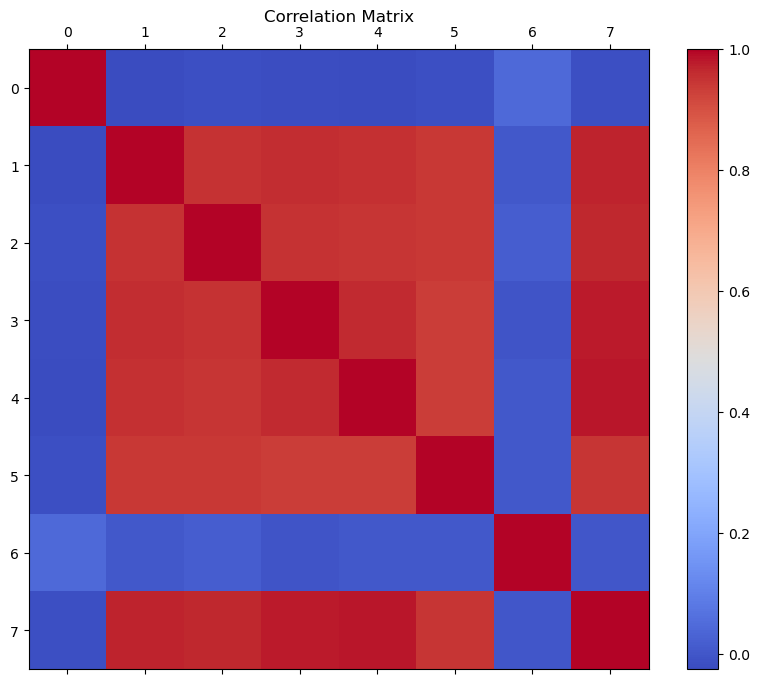


Distribution of Categorical Columns:

Device Model Value Counts:
Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

Operating System Value Counts:
Operating System
Android    554
iOS        146
Name: count, dtype: int64

Gender Value Counts:
Gender
Male      364
Female    336
Name: count, dtype: int64

Inspecting categorical data for inconsistencies:

Unique values in Device Model:
['Google Pixel 5' 'OnePlus 9' 'Xiaomi Mi 11' 'iPhone 12'
 'Samsung Galaxy S21']

Unique values in Operating System:
['Android' 'iOS']

Unique values in Gender:
['Male' 'Female']

Key Findings from Initial Data Inspection:
1. Observed missing values in the following columns:
Series([], dtype: int64)
2. Checked for duplicate rows.
3. Found 0 duplicate rows.
4. Identified distributions and potential outliers for numeric columns.
5. Reviewed correlations between numeric columns.
6. Analyzed val

In [4]:
# Load the dataset
file_path = 'user_behavior_dataset.csv'
try:
    # Attempt to load the dataset into a DataFrame
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except Exception as e:
    # Handle errors that occur during file loading
    print(f"An error occurred while loading the dataset: {e}")

# Display the first few rows of the dataset
print("\nInitial Inspection: Displaying the first 5 rows of the dataset.")
print(data.head())

# Display dataset information
print("\nDataset Information:")
data.info()

# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())  # Summarizes the count of missing values in each column

# Inspect data types and unique values for categorical variables
print("\nUnique Values in Each Column:")
for column in data.columns:
    # Prints the number of unique values for each column
    print(f"{column}: {data[column].nunique()} unique values")

# Visualize missing data distribution
plt.figure(figsize=(10, 6))
plt.bar(data.columns, data.isnull().sum())  # Bar chart of missing values
plt.title("Missing Data per Column")
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45, ha='right')
plt.show()

# Check for duplicate rows
print("\nChecking for duplicate rows in the dataset.")
duplicates = data.duplicated().sum()  # Counts duplicate rows
print(f"Number of duplicate rows: {duplicates}")

# Visualize distribution of numeric columns
numeric_columns = data.select_dtypes(include=np.number).columns
print("\nVisualizing distributions for numeric columns:")
for column in numeric_columns:
    # Creates histograms for numeric columns
    plt.figure(figsize=(8, 4))
    data[column].hist(bins=30)  # Plot histogram
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

# Investigate potential outliers using boxplots
print("\nInvestigating potential outliers with boxplots:")
for column in numeric_columns:
    # Creates boxplots to identify outliers
    plt.figure(figsize=(8, 4))
    plt.boxplot(data[column].dropna(), vert=False)  # Exclude NaN values
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.show()

# Check correlations between numeric columns
print("\nCorrelation Matrix for Numeric Columns:")
correlation_matrix = data[numeric_columns].corr()  # Calculate correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)  # Heatmap of correlations
plt.colorbar()
plt.title("Correlation Matrix", pad=20)
plt.show()

# Check categorical data distributions
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
print("\nDistribution of Categorical Columns:")
for column in categorical_columns:
    # Displays the count of each unique value for categorical columns
    print(f"\n{column} Value Counts:")
    print(data[column].value_counts())

# Inspect data for inconsistencies or anomalies in categorical data
print("\nInspecting categorical data for inconsistencies:")
for column in categorical_columns:
    # Prints unique values to check for inconsistencies
    print(f"\nUnique values in {column}:")
    print(data[column].unique())

# Summarize key findings
print("\nKey Findings from Initial Data Inspection:")
print("Observed missing values in the following columns:")
print(data.isnull().sum()[data.isnull().sum() > 0])  # Highlights columns with missing values
print("Checked for duplicate rows.")
print(f"3. Found {duplicates} duplicate rows.")

# Data Preprocessing and Cleaning

In [6]:
# Check for missing values
print("Missing values before cleaning:")
print(data.isnull().sum())  # Summarize missing values in each column

# Handle missing values
data = data.ffill()  # Forward fill missing values (uses the previous valid value for NaNs)

# Remove duplicates
initial_rows = data.shape[0]  # Store the initial number of rows
data.drop_duplicates(inplace=True)  # Remove duplicate rows
final_rows = data.shape[0]  # Store the final number of rows after duplicate removal
print(f"Removed {initial_rows - final_rows} duplicate rows.")  # Display the number of rows removed

# Clean and standardize specific categorical columns for consistency
data['Device Model'] = data['Device Model'].str.strip().str.title()  # Remove extra spaces and capitalize each word
data['Operating System'] = data['Operating System'].str.strip().str.title()  # Clean and standardize OS names
data['Gender'] = data['Gender'].str.strip().str.capitalize()  # Capitalize gender values ( "male" to "Male")

print("\nData after preprocessing:")
data.info()  # Verify the structure and non-null counts after preprocessing
print("\nFirst few rows of the cleaned dataset:")
print(data.head())  # Display the first few rows of the cleaned dataset to verify changes


Missing values before cleaning:
User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

Checking and removing duplicates...
Removed 0 duplicate rows.

Data after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Batt

# Goal 1: Analyze User Behavior Patterns

**1. Average Screen-On Time by Age Group and Gender**


Average Screen-On Time by Age Group and Gender:
  Age Group  Gender  Screen On Time (hours/day)
0     18-25  Female                    5.391071
1     18-25    Male                    5.462667
2     26-35  Female                    5.197872
3     26-35    Male                    4.998780
4     36-45  Female                    5.196203
5     36-45    Male                    4.781395
6     46-55  Female                    5.431169
7     46-55    Male                    5.830000
8     56-65  Female                    4.953333
9     56-65    Male                    5.406452


C:\Users\kkery\AppData\Local\Temp\ipykernel_312\893716156.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_screen_time = data.groupby(['Age Group', 'Gender'])['Screen On Time (hours/day)'].mean().reset_index()


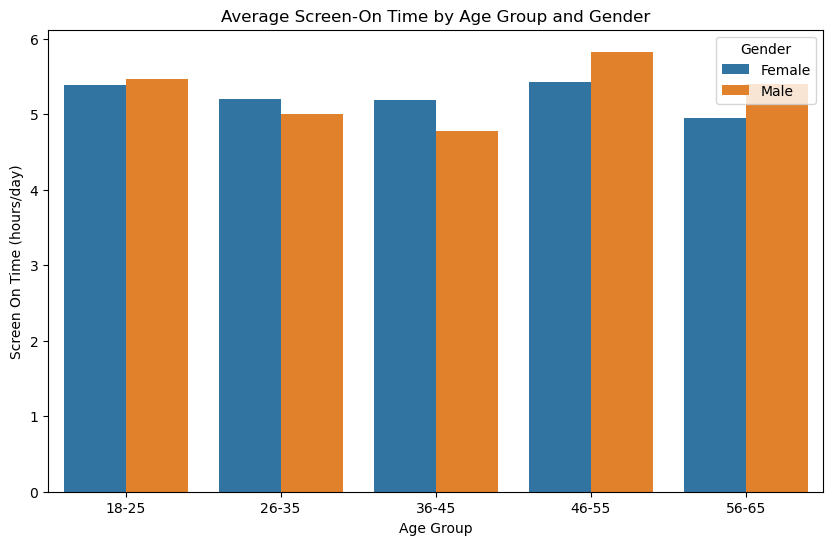

In [9]:
# Create a new categorical column 'Age Group' based on the 'Age' column
data['Age Group'] = pd.cut(
    data['Age'], 
    bins=[17, 25, 35, 45, 55, 65],  # Define age range bins
    labels=["18-25", "26-35", "36-45", "46-55", "56-65"]  # Assign labels to each bin
)

# Calculate the average screen-on time grouped by 'Age Group' and 'Gender'
avg_screen_time = data.groupby(['Age Group', 'Gender'])['Screen On Time (hours/day)'].mean().reset_index()

print("\nAverage Screen-On Time by Age Group and Gender:")
print(avg_screen_time)

# Visualize the average screen-on time using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_screen_time, 
    x='Age Group', 
    y='Screen On Time (hours/day)', 
    hue='Gender'  # Separate bars by Gender
)
plt.title('Average Screen-On Time by Age Group and Gender') 
plt.xlabel('Age Group')  
plt.ylabel('Screen On Time (hours/day)')  
plt.legend(title='Gender')  
plt.show()  


**2. App Usage Time by Age Group**


App Usage Time by Age Group:
  Age Group  App Usage Time (min/day)
0     18-25                288.244275
1     26-35                260.306818
2     36-45                253.800000
3     46-55                290.335329
4     56-65                259.885246


C:\Users\kkery\AppData\Local\Temp\ipykernel_312\2556028166.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_usage_age = data.groupby('Age Group')['App Usage Time (min/day)'].mean().reset_index()


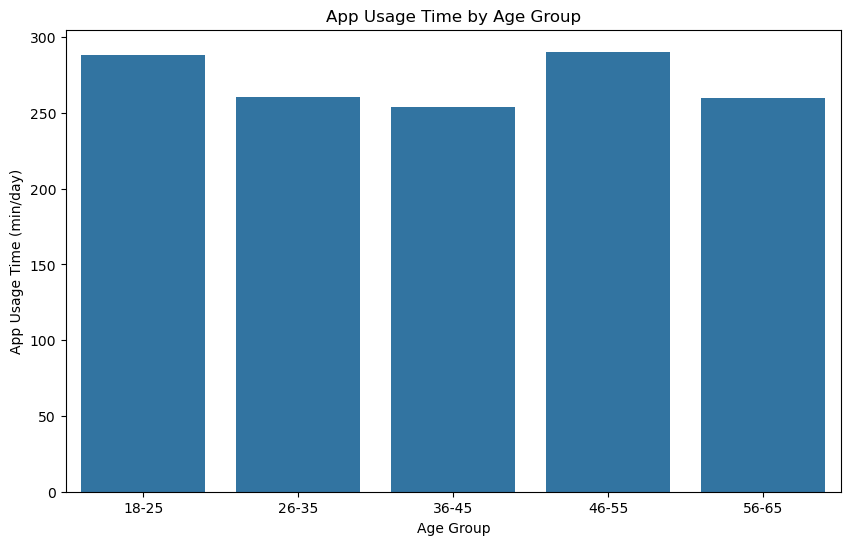

In [11]:
# Calculate the average app usage time grouped by 'Age Group'
app_usage_age = data.groupby('Age Group')['App Usage Time (min/day)'].mean().reset_index()

print("\nApp Usage Time by Age Group:")
print(app_usage_age)

# Visualize the average app usage time using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=app_usage_age, 
    x='Age Group', 
    y='App Usage Time (min/day)'
)
plt.title('App Usage Time by Age Group') 
plt.xlabel('Age Group')  
plt.ylabel('App Usage Time (min/day)')  
plt.show()  


**3. Data Usage by Gender**


Data Usage by Gender:
   Gender  Data Usage (MB/day)
0  Female           914.321429
1    Male           943.978022


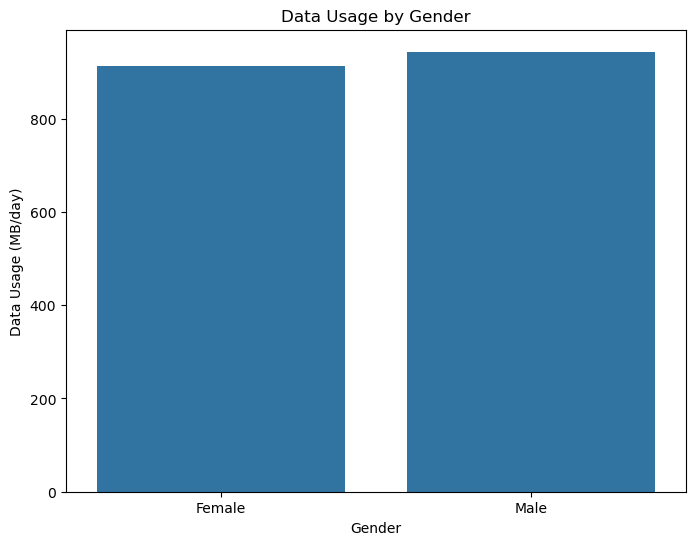

In [13]:
# Calculate the average data usage grouped by 'Gender'
data_usage_gender = data.groupby('Gender')['Data Usage (MB/day)'].mean().reset_index()

print("\nData Usage by Gender:")
print(data_usage_gender)

# Visualize the average data usage by gender using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=data_usage_gender, 
    x='Gender', 
    y='Data Usage (MB/day)'
)
plt.title('Data Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Data Usage (MB/day)')
plt.show()


**4. Battery Drain Analysis by Operating System**


Battery Drain Analysis by Operating System:
  Operating System  Battery Drain (mAh/day)
0          Android              1508.198556
1              Ios              1589.513699


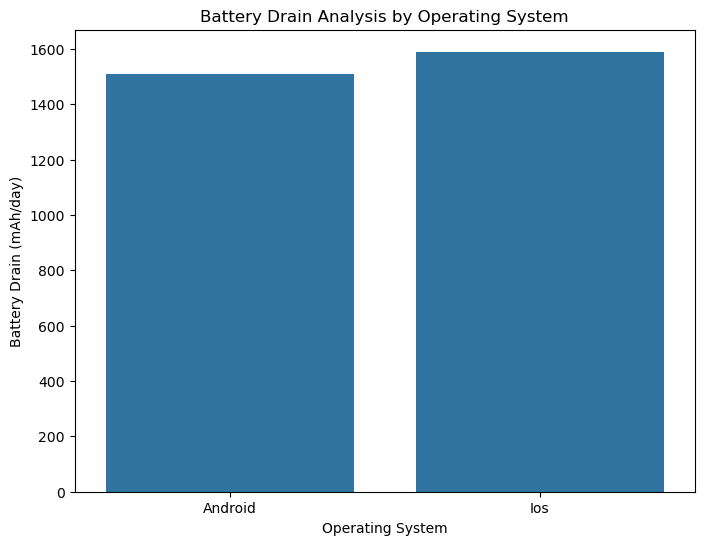

In [15]:
# Calculate the average battery drain grouped by 'Operating System'
battery_os = data.groupby('Operating System')['Battery Drain (mAh/day)'].mean().reset_index()

print("\nBattery Drain Analysis by Operating System:")
print(battery_os)

# Visualize the average battery drain by operating system using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=battery_os, 
    x='Operating System', 
    y='Battery Drain (mAh/day)'  # Plot 'Battery Drain (mAh/day)' against 'Operating System'
)
plt.title('Battery Drain Analysis by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Battery Drain (mAh/day)')
plt.show()


**5. Number of Apps Installed by Age Group**


Number of Apps Installed by Age Group:
  Age Group  Number of Apps Installed
0     18-25                 54.213740
1     26-35                 48.369318
2     36-45                 47.200000
3     46-55                 54.011976
4     56-65                 50.065574


C:\Users\kkery\AppData\Local\Temp\ipykernel_312\920930442.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  apps_installed_age = data.groupby('Age Group')['Number of Apps Installed'].mean().reset_index()


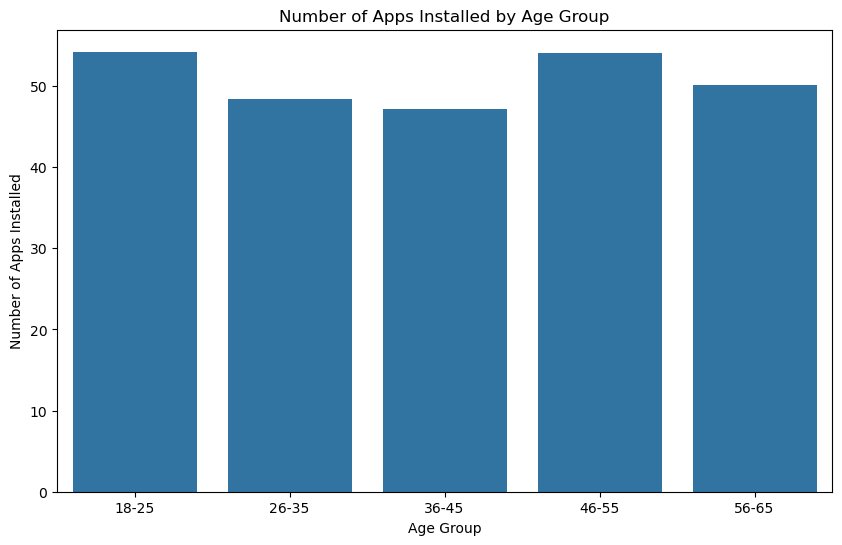

In [17]:
# Calculate the average number of apps installed grouped by 'Age Group'
apps_installed_age = data.groupby('Age Group')['Number of Apps Installed'].mean().reset_index()

print("\nNumber of Apps Installed by Age Group:")
print(apps_installed_age)

# Visualize the average number of apps installed by age group using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=apps_installed_age, 
    x='Age Group', 
    y='Number of Apps Installed'  # Plot 'Number of Apps Installed' against 'Age Group'
)
plt.title('Number of Apps Installed by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Apps Installed')
plt.show()

**6. Correlation Heatmap of Numeric Features**


Correlation Matrix for Numeric Features:
                             User ID  App Usage Time (min/day)  \
User ID                     1.000000                 -0.024957   
App Usage Time (min/day)   -0.024957                  1.000000   
Screen On Time (hours/day) -0.014287                  0.950333   
Battery Drain (mAh/day)    -0.019377                  0.956385   
Number of Apps Installed   -0.023914                  0.955253   
Data Usage (MB/day)        -0.014527                  0.942308   
Age                         0.045188                  0.004382   
User Behavior Class        -0.016242                  0.970498   

                            Screen On Time (hours/day)  \
User ID                                      -0.014287   
App Usage Time (min/day)                      0.950333   
Screen On Time (hours/day)                    1.000000   
Battery Drain (mAh/day)                       0.948983   
Number of Apps Installed                      0.946975   
Data Usage (MB/

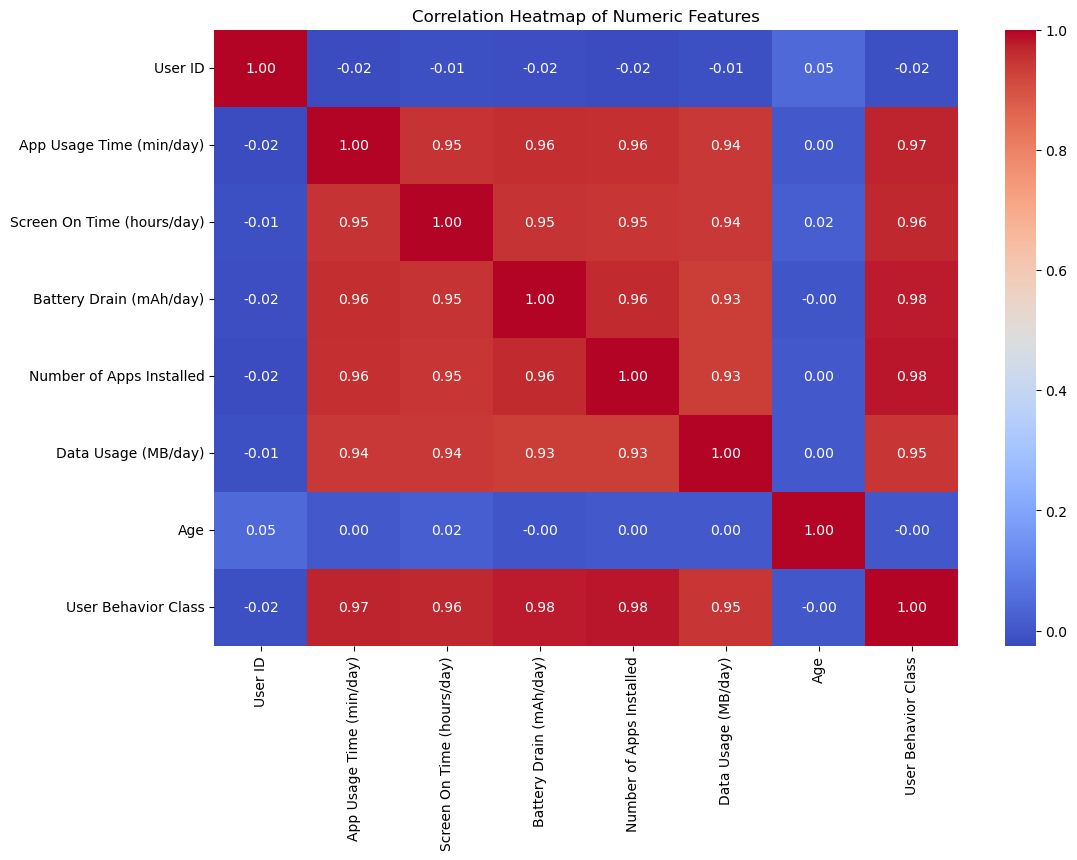

In [19]:
# Select only numeric columns from the dataset
numeric_cols = data.select_dtypes(include=np.number)

print("\nCorrelation Matrix for Numeric Features:")
correlation_matrix = numeric_cols.corr()  # Compute pairwise correlations between numeric columns
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True,  # Display correlation values on the heatmap
    cmap='coolwarm',  # Use a diverging color palette
    fmt='.2f'  # Format correlation values to two decimal places
)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


**7. Distribution of User Behavior Classes**


Distribution of User Behavior Classes:
User Behavior Class
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64


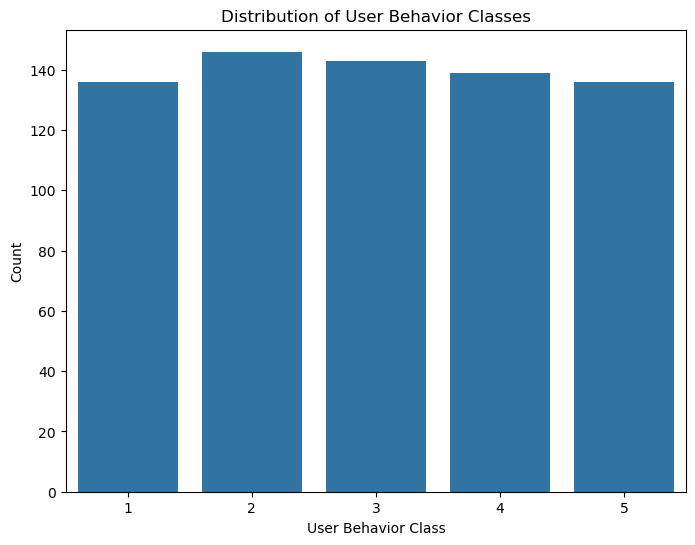

In [21]:
# Count the occurrences of each class in the 'User Behavior Class' column
behavior_class_counts = data['User Behavior Class'].value_counts()

print("\nDistribution of User Behavior Classes:")
print(behavior_class_counts)

# Visualize the distribution using a count plot
plt.figure(figsize=(8, 6))
sns.countplot(
    data=data, 
    x='User Behavior Class'
)
plt.title('Distribution of User Behavior Classes')
plt.xlabel('User Behavior Class')
plt.ylabel('Count')
plt.show()


**8. App Usage vs. Screen-On Time (Scatter Plot)**


Scatter Plot: App Usage vs. Screen-On Time
This plot visualizes the relationship between App Usage Time and Screen-On Time.


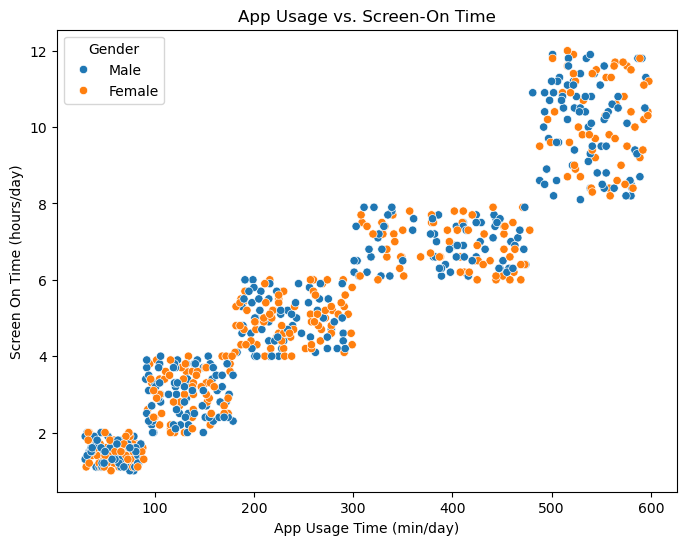

In [23]:
print("\nScatter Plot: App Usage vs. Screen-On Time")
print("This plot visualizes the relationship between App Usage Time and Screen-On Time.")

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, 
                x='App Usage Time (min/day)',
                y='Screen On Time (hours/day)',
                hue='Gender')
plt.title('App Usage vs. Screen-On Time')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Screen On Time (hours/day)')
plt.legend(title='Gender')
plt.show()

**9. Battery Drain vs. Data Usage**


Scatter Plot: Battery Drain vs. Data Usage
This plot visualizes the relationship between Battery Drain and Data Usage.


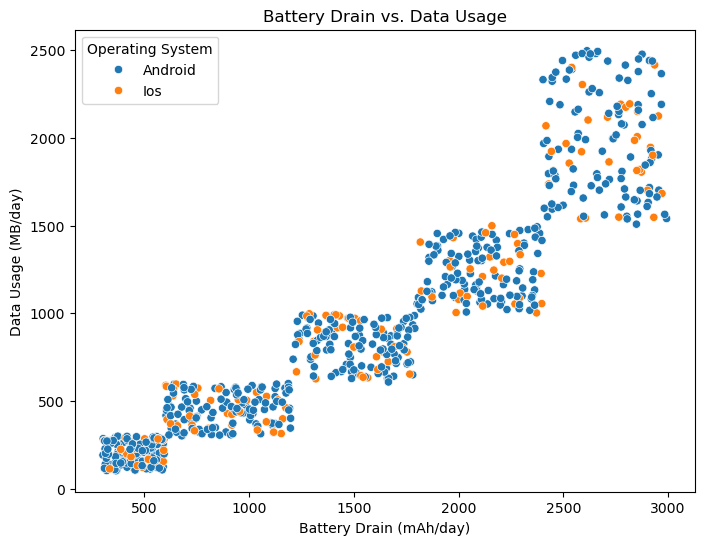

In [25]:
print("\nScatter Plot: Battery Drain vs. Data Usage")
print("This plot visualizes the relationship between Battery Drain and Data Usage.")

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, 
                x='Battery Drain (mAh/day)', 
                y='Data Usage (MB/day)',
                hue='Operating System')
plt.title('Battery Drain vs. Data Usage')
plt.xlabel('Battery Drain (mAh/day)')
plt.ylabel('Data Usage (MB/day)')
plt.legend(title='Operating System')
plt.show()

**10. Screen-On Time by Device Model (Top 10)**


Screen-On Time by Device Model (Top 10):
         Device Model  Screen On Time (hours/day)
0      Google Pixel 5                    5.076056
1           Iphone 12                    5.430822
2           Oneplus 9                    5.241353
3  Samsung Galaxy S21                    5.318045
4        Xiaomi Mi 11                    5.293151


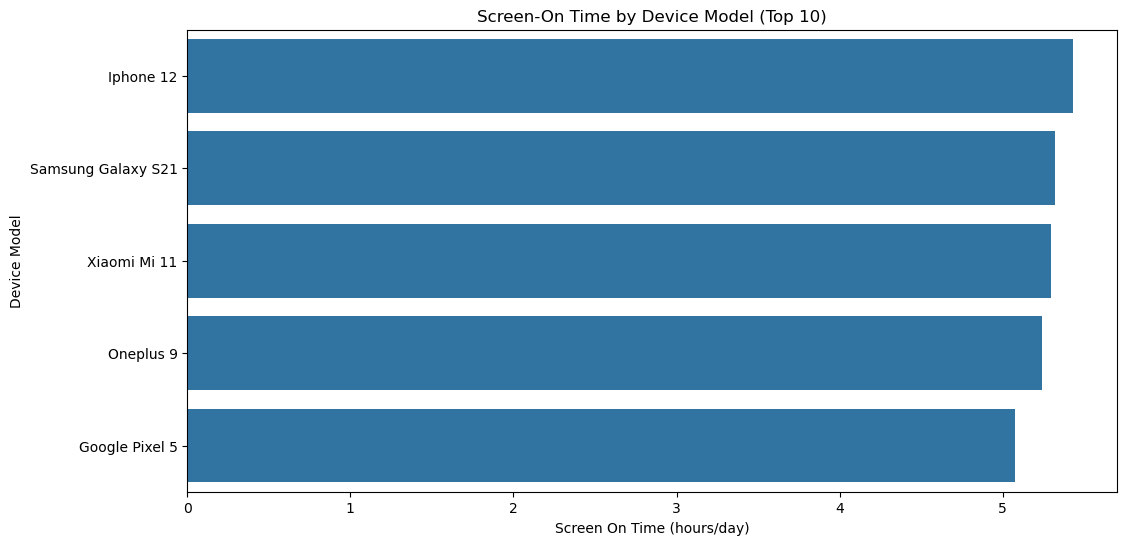

In [27]:
# Identify the top 10 most common device models
top_10_devices = data['Device Model'].value_counts().nlargest(10).index

# Filter the data to include only rows corresponding to the top 10 device models
filtered_data = data[data['Device Model'].isin(top_10_devices)]

# Calculate the average screen-on time grouped by device model for the top 10 devices
screen_time_device = filtered_data.groupby('Device Model')['Screen On Time (hours/day)'].mean().reset_index()


print("\nScreen-On Time by Device Model (Top 10):")
print(screen_time_device)

# Visualize the average screen-on time for the top 10 device models using a horizontal bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=screen_time_device, 
    x='Screen On Time (hours/day)',  # Plot 'Screen On Time (hours/day)' on the x-axis
    y='Device Model',  # Plot 'Device Model' on the y-axis
    order=screen_time_device.sort_values(by='Screen On Time (hours/day)', ascending=False)['Device Model']  # Sort devices by screen-on time
)
plt.title('Screen-On Time by Device Model (Top 10)')
plt.xlabel('Screen On Time (hours/day)')
plt.ylabel('Device Model')
plt.show()


**3.11 Number of installed applications by operating system**


Number of Apps Installed by Operating System:
  Operating System  Number of Apps Installed
0          Android                 50.142599
1              Ios                 52.726027


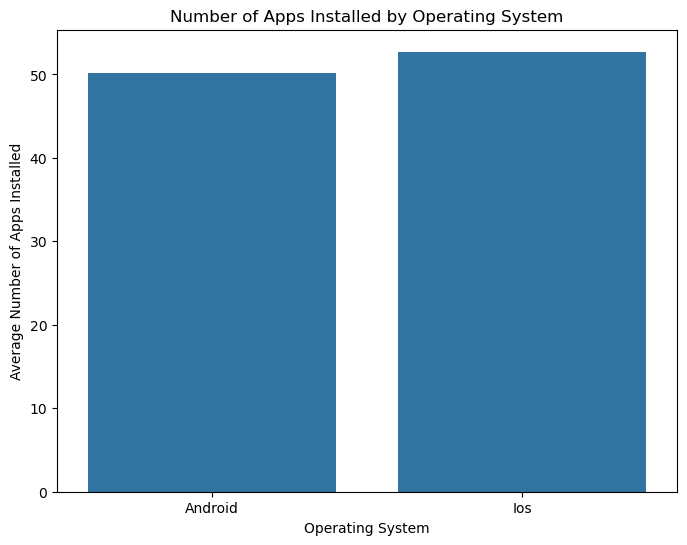

In [29]:
# Calculate the average number of apps installed grouped by 'Operating System'
apps_os = data.groupby('Operating System')['Number of Apps Installed'].mean().reset_index()

print("\nNumber of Apps Installed by Operating System:")
print(apps_os)

# Visualize the average number of apps installed by operating system using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=apps_os, 
    x='Operating System',  # Operating systems on the x-axis
    y='Number of Apps Installed'  # Average number of apps installed on the y-axis
)
plt.title('Number of Apps Installed by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Average Number of Apps Installed')
plt.show()


**3.12 Distribution of users by age groups**


User Distribution by Age Group:
Age Group
18-25    131
26-35    176
36-45    165
46-55    167
56-65     61
Name: count, dtype: int64


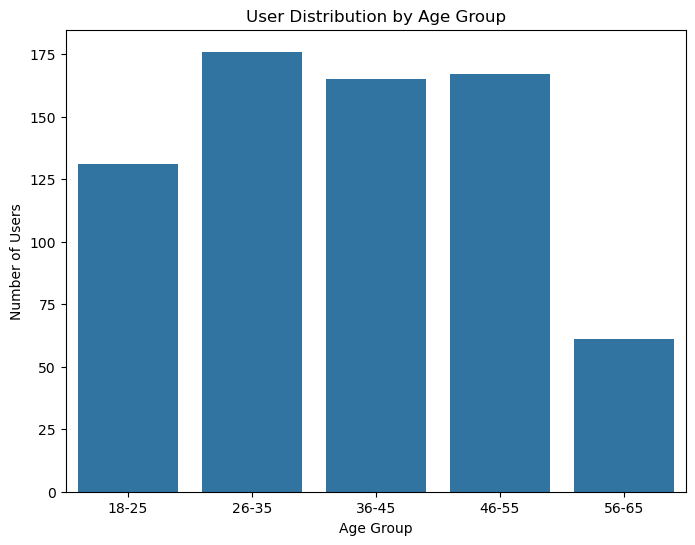

In [31]:
# Calculate the distribution of users by age group
age_distribution = data['Age Group'].value_counts().sort_index()  # Count occurrences and sort by age group order

print("\nUser Distribution by Age Group:")
print(age_distribution)

# Visualize the distribution using a bar plot
plt.figure(figsize=(8, 6)) 
sns.barplot(
    x=age_distribution.index,  # Age groups on the x-axis
    y=age_distribution.values  # Number of users on the y-axis
)
plt.title('User Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.show()


**3.13 Ratio of app usage time to screen on time**


App Usage to Screen-On Time Ratio by Age Group:
  Age Group  App Usage Ratio
0     18-25         0.848602
1     26-35         0.817186
2     36-45         0.821005
3     46-55         0.820169
4     56-65         0.809764


C:\Users\kkery\AppData\Local\Temp\ipykernel_312\359403147.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_usage_ratio = data.groupby('Age Group')['App Usage Ratio'].mean().reset_index()


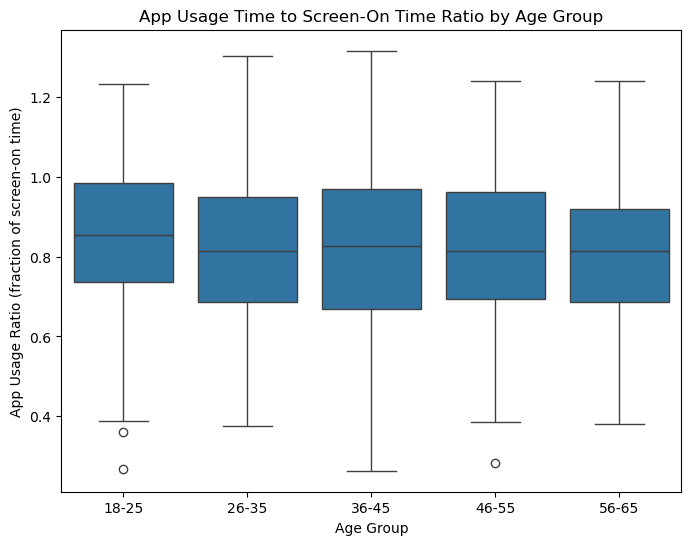

In [33]:
# Calculate the 'App Usage Ratio' as the fraction of screen-on time spent on apps
data['App Usage Ratio'] = data['App Usage Time (min/day)'] / (data['Screen On Time (hours/day)'] * 60)

# Calculate the average app usage ratio grouped by 'Age Group'
app_usage_ratio = data.groupby('Age Group')['App Usage Ratio'].mean().reset_index()

print("\nApp Usage to Screen-On Time Ratio by Age Group:")
print(app_usage_ratio)

# Visualize the app usage ratio distribution using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=data, 
    x='Age Group',  # Age groups on the x-axis
    y='App Usage Ratio'  # App usage ratio on the y-axis
)
plt.title('App Usage Time to Screen-On Time Ratio by Age Group')
plt.xlabel('Age Group')
plt.ylabel('App Usage Ratio (fraction of screen-on time)')
plt.show()


**3.14 Heat Map: OS and Gender vs. Data Usage**


Data Usage (MB/day) by OS and Gender:
Gender                Female        Male
Operating System                        
Android           898.347328  940.030822
Ios               970.878378  959.986111


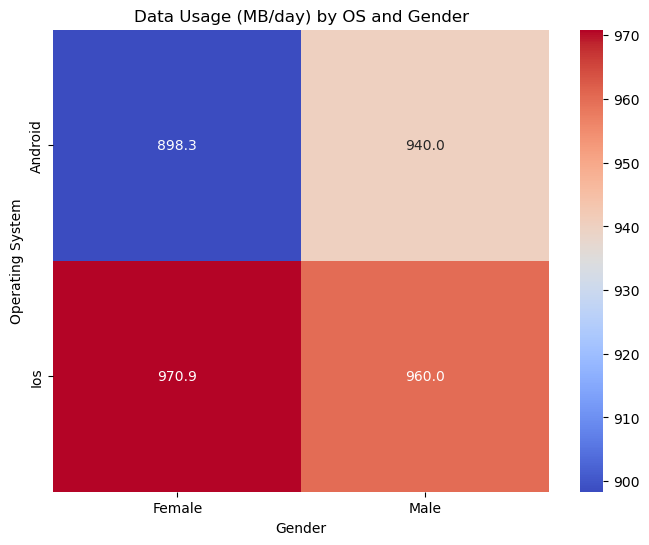

In [35]:
# Create a pivot table to calculate average data usage grouped by 'Operating System' and 'Gender'
os_gender_data = data.pivot_table(
    values='Data Usage (MB/day)',  # The value to aggregate
    index='Operating System',  # Rows will represent operating systems
    columns='Gender',  # Columns will represent genders
    aggfunc='mean'  # Calculate the mean data usage for each group
)

print("\nData Usage (MB/day) by OS and Gender:")
print(os_gender_data)

# Visualize the pivot table as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    os_gender_data, 
    annot=True,  # Display the mean values on the heatmap
    cmap='coolwarm',  # Use a diverging color palette
    fmt='.1f'  # Format the values to one decimal place
)
plt.title('Data Usage (MB/day) by OS and Gender')
plt.show()


**3.15 Popularity of devices among users**


User Distribution by Device Model:
Device Model
Xiaomi Mi 11          146
Iphone 12             146
Google Pixel 5        142
Oneplus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64


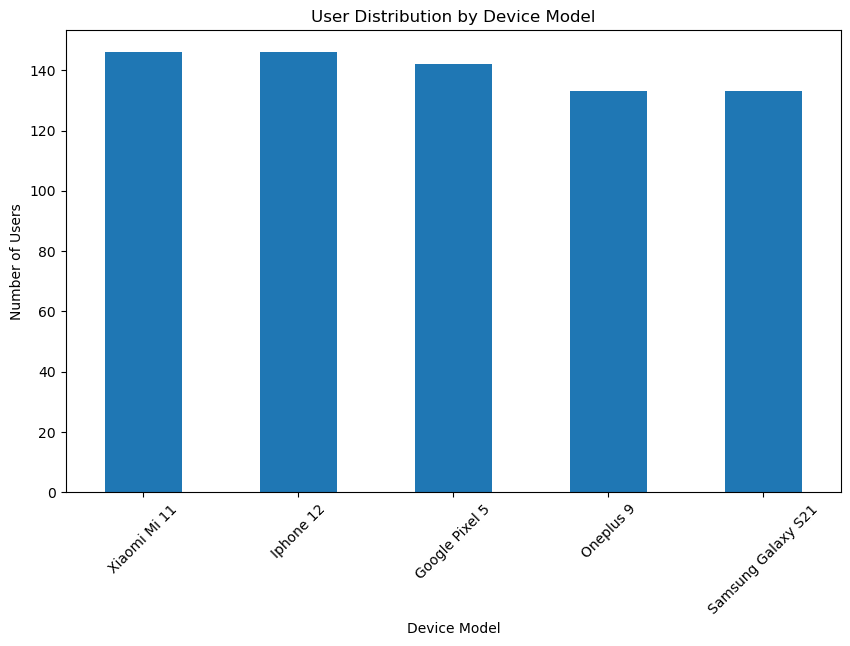

In [37]:
# Count the number of users for each device model
device_counts = data['Device Model'].value_counts()

print("\nUser Distribution by Device Model:")
print(device_counts)

# Visualize the distribution using a bar plot
plt.figure(figsize=(10, 6))
device_counts.plot(kind='bar')  # Create a bar plot using the device counts
plt.title('User Distribution by Device Model')
plt.xlabel('Device Model')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()


**3.16 Analysis of application usage time by gender**


App Usage Time by Gender:
   Gender  App Usage Time (min/day)
0  Female                271.967262
1    Male                270.354396


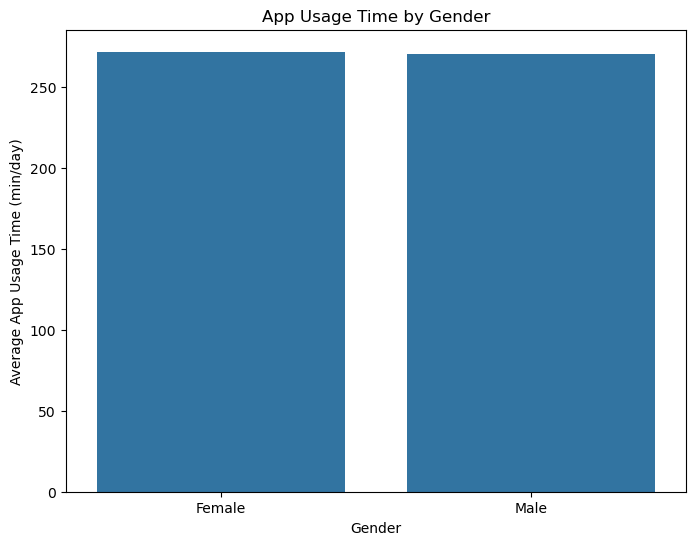

In [39]:
# Calculate the average app usage time grouped by 'Gender'
app_time_gender = data.groupby('Gender')['App Usage Time (min/day)'].mean().reset_index()

print("\nApp Usage Time by Gender:")
print(app_time_gender)

# Visualize the average app usage time by gender using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=app_time_gender, 
    x='Gender',  # Gender categories on the x-axis
    y='App Usage Time (min/day)'  # Average app usage time on the y-axis
)
plt.title('App Usage Time by Gender')
plt.xlabel('Gender')
plt.ylabel('Average App Usage Time (min/day)')
plt.show()


**3.17 Effect of age on battery consumption**


Battery Drain by Age Group:
  Age Group  Battery Drain (mAh/day)
0     18-25              1630.931298
1     26-35              1465.034091
2     36-45              1425.630303
3     46-55              1617.814371
4     56-65              1487.032787


C:\Users\kkery\AppData\Local\Temp\ipykernel_312\3201732166.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  battery_age = data.groupby('Age Group')['Battery Drain (mAh/day)'].mean().reset_index()


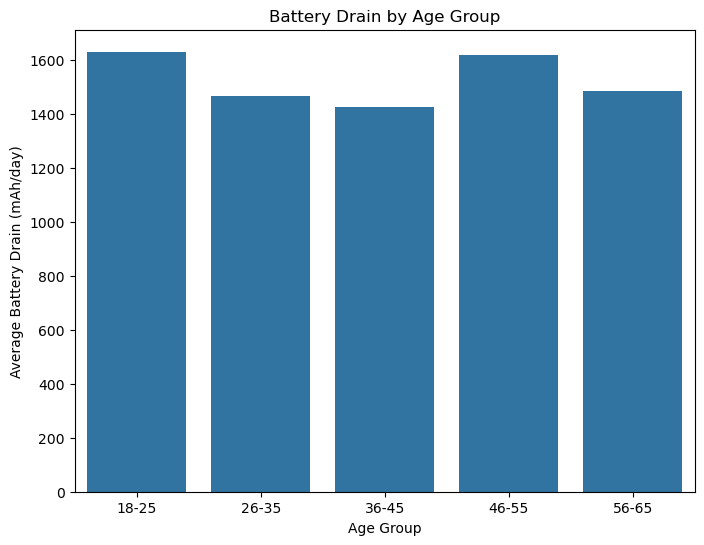

In [41]:
# Calculate the average battery drain grouped by 'Age Group'
battery_age = data.groupby('Age Group')['Battery Drain (mAh/day)'].mean().reset_index()

print("\nBattery Drain by Age Group:")
print(battery_age)

# Visualize the average battery drain by age group using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=battery_age, 
    x='Age Group',  # Age groups on the x-axis
    y='Battery Drain (mAh/day)'  # Average battery drain on the y-axis
)
plt.title('Battery Drain by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Battery Drain (mAh/day)')
plt.show()


**3.18 Comparative analysis of data by behavior classes**


Comparison of Features by User Behavior Class:
                        User ID  App Usage Time (min/day)  \
User Behavior Class                                         
1                    347.772059                 60.426471   
2                    355.363014                131.972603   
3                    362.062937                235.398601   
4                    345.208633                395.748201   
5                    341.257353                541.419118   

                     Screen On Time (hours/day)  Battery Drain (mAh/day)  \
User Behavior Class                                                        
1                                      1.490441               454.977941   
2                                      3.037671               883.808219   
3                                      4.955944              1515.055944   
4                                      6.909353              2105.805755   
5                                     10.114706              2701.01

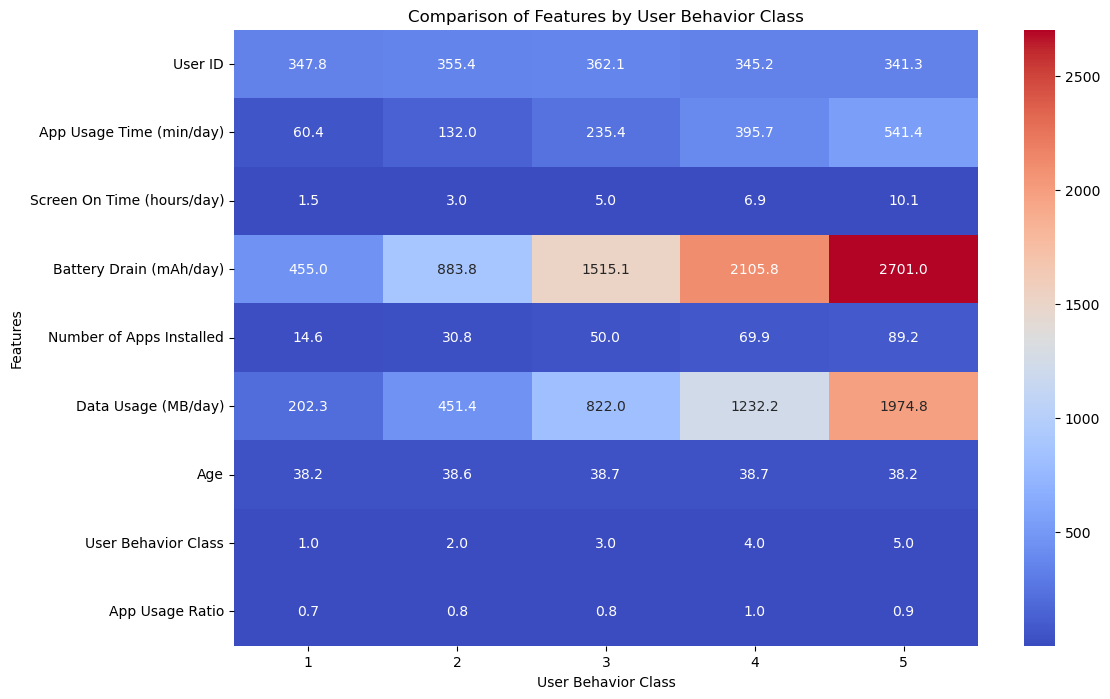

In [43]:
# Exclude non-numeric columns
numeric_columns = data.select_dtypes(include=['number'])  # Select only numeric columns from the dataset

# Group by 'User Behavior Class' and compute the mean for numeric columns
behavior_class_analysis = numeric_columns.groupby(data['User Behavior Class']).mean()

print("\nComparison of Features by User Behavior Class:")
print(behavior_class_analysis)

# Visualize the comparison using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    behavior_class_analysis.T,  # Transpose the DataFrame for better alignment on the heatmap
    annot=True,  # Display the mean values on the heatmap
    cmap='coolwarm',  # Use a diverging color palette
    fmt='.1f'  # Format the values to one decimal place
)
plt.title('Comparison of Features by User Behavior Class')
plt.ylabel('Features')
plt.xlabel('User Behavior Class')
plt.show()


# Goal 2: Develop a Predictive Model for User Behavior Classification

In [45]:
# Define features and target
X = data.drop(columns=['User Behavior Class', 'User ID'])  # Drop target and unique identifier
y = data['User Behavior Class']  # Target variable for classification

# Identify categorical and numeric columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns  # Select categorical columns
numeric_features = X.select_dtypes(include=['number']).columns  # Select numeric columns

# Preprocessing, Encode categorical variables and scale numeric variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Scale numeric features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Encode categorical features
    ]
)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Decision Tree Classifier
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', DecisionTreeClassifier(random_state=42))])

# Combine preprocessing and Decision Tree Classifier into a single pipeline
dt_pipeline.fit(X_train, y_train)  # Train the model
y_pred_dt = dt_pipeline.predict(X_test)  # Predict on the test set

# Evaluate Decision Tree
print("\nDecision Tree Classifier Performance:")
print(classification_report(y_test, y_pred_dt))  # Print precision, recall, F1 score, and support
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))  # Print confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred_dt))  # Print accuracy score

# RandomForest Classifier
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', RandomForestClassifier(random_state=42))])
# Combine preprocessing and RandomForest Classifier into a single pipeline
rf_pipeline.fit(X_train, y_train)  # Train the model
y_pred_rf = rf_pipeline.predict(X_test)  # Predict on the test set

# Evaluate RandomForest
print("\nRandomForest Classifier Performance:")
print(classification_report(y_test, y_pred_rf))  # Print classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))  # Print confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred_rf))  # Print accuracy score

# Hyperparameter Tuning for RandomForest using RandomizedSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100],  # Number of trees in the forest
    'classifier__max_depth': [10, 20],  # Maximum depth of the trees
    'classifier__min_samples_split': [2, 5]  # Minimum samples required to split a node
}

randomized_search = RandomizedSearchCV(rf_pipeline, param_grid, n_iter=10, cv=3, scoring='accuracy', n_jobs=2, random_state=42)
# Perform hyperparameter tuning with RandomizedSearchCV
randomized_search.fit(X_train, y_train)  # Train the model with cross validation

# Best Parameters and Evaluation
print("\nBest Parameters from Randomized Search:")
print(randomized_search.best_params_)  # Display the best hyperparameters

best_rf_model = randomized_search.best_estimator_  # Retrieve the best model
y_pred_best_rf = best_rf_model.predict(X_test)  # Predict on the test set with the best model

print("\nPerformance of Best Model (Tuned RandomForest):")
print(classification_report(y_test, y_pred_best_rf))  # Print classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))  # Print confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))  # Print accuracy score


Decision Tree Classifier Performance:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        43
           4       0.98      1.00      0.99        41
           5       1.00      0.98      0.99        41

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

Confusion Matrix:
[[41  0  0  0  0]
 [ 0 44  0  0  0]
 [ 0  0 43  0  0]
 [ 0  0  0 41  0]
 [ 0  0  0  1 40]]
Accuracy: 0.9952380952380953

Random Forest Classifier Performance:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        43
           4       1.00      1.00      1.00        41
           5       1.00 

C:\Users\kkery\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best Parameters from Randomized Search:
{'classifier__n_estimators': 50, 'classifier__min_samples_split': 2, 'classifier__max_depth': 10}

Performance of Best Model (Tuned Random Forest):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        43
           4       1.00      1.00      1.00        41
           5       1.00      1.00      1.00        41

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

Confusion Matrix:
[[41  0  0  0  0]
 [ 0 44  0  0  0]
 [ 0  0 43  0  0]
 [ 0  0  0 41  0]
 [ 0  0  0  0 41]]
Accuracy: 1.0


**1. Confusion Matrix Visualization**

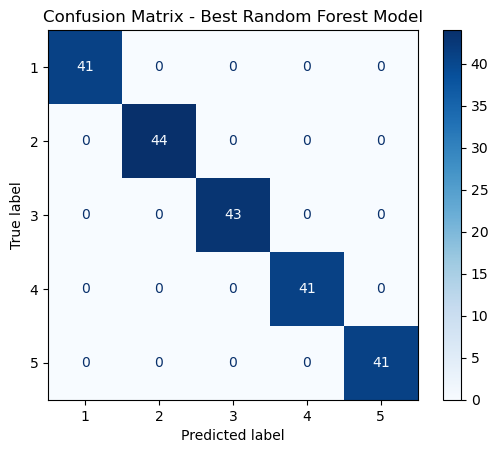

In [47]:
# Visualizing Confusion Matrix for the Best Model
disp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred_best_rf),  # Generate confusion matrix
    display_labels=best_rf_model.classes_  # Use the class labels from the best model
)

# Plot the confusion matrix with a color map and integer format for values
disp.plot(cmap='Blues', values_format='d')  # 'Blues' for color map, 'd' for integer formatting
plt.title("Confusion Matrix - Best RandomForest Model")
plt.show()


**2. Feature Importance for RandomForest**


Feature Importance from Random Forest Model:
                                 Feature  Importance
2           num__Battery Drain (mAh/day)    0.217501
4               num__Data Usage (MB/day)    0.214551
0          num__App Usage Time (min/day)    0.198453
3          num__Number of Apps Installed    0.178181
1        num__Screen On Time (hours/day)    0.158065
6                   num__App Usage Ratio    0.017616
5                               num__Age    0.004879
10  cat__Device Model_Samsung Galaxy S21    0.001724
13             cat__Operating System_Ios    0.001230
11        cat__Device Model_Xiaomi Mi 11    0.001074
7       cat__Device Model_Google Pixel 5    0.000881
17                  cat__Age Group_26-35    0.000878
18                  cat__Age Group_36-45    0.000859
9            cat__Device Model_Oneplus 9    0.000813
15                      cat__Gender_Male    0.000580
16                  cat__Age Group_18-25    0.000579
8            cat__Device Model_Iphone 12    0.000497


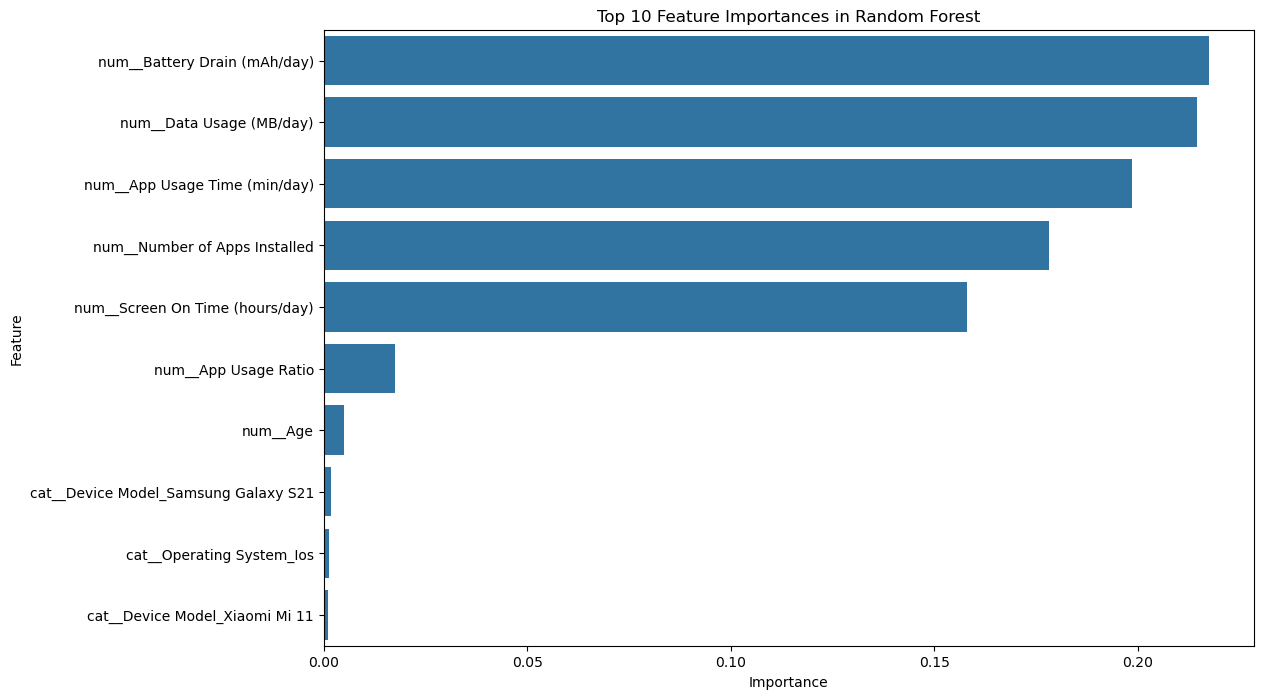

In [49]:
# Extract and display feature importances
print("\nFeature Importance from RandomForest Model:")
feature_importances = best_rf_model.named_steps['classifier'].feature_importances_
# Extract feature names from the preprocessors output
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Convert feature importances into a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)  # Sort by importance in descending order

# Display the feature importance DataFrame
print(importance_df)

# Visualize the top 10 feature importances using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')  # Plot top 10 features
plt.title('Top 10 Feature Importances in RandomForest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


**3. Learning Curve**

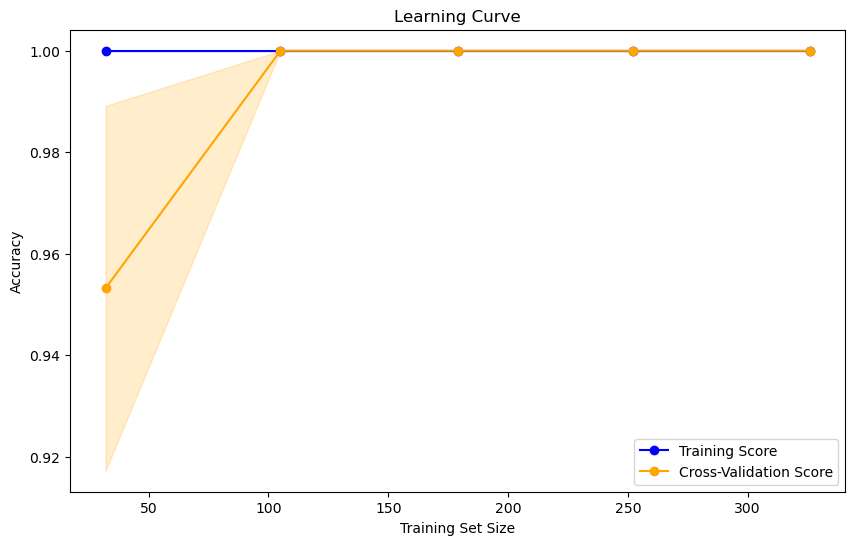

In [51]:
# Generate Learning Curve Data
train_sizes, train_scores, test_scores = learning_curve(
    best_rf_model,  # The best RandomForest model
    X_train,  # Training data (features)
    y_train,  # Training data (target)
    cv=3,  # Use 3-fold cross-validation
    scoring='accuracy'  # Evaluate accuracy
)

# Calculate the mean and standard deviation of training and validation scores
train_mean = train_scores.mean(axis=1)  # Mean training accuracy for each training set size
train_std = train_scores.std(axis=1)  # Standard deviation of training accuracy
test_mean = test_scores.mean(axis=1)  # Mean cross-validation accuracy
test_std = test_scores.std(axis=1)  # Standard deviation of cross-validation accuracy

# Plot the Learning Curve
plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(train_sizes, train_mean, 'o-', label='Training Score', color='blue')  # Plot training scores
plt.plot(train_sizes, test_mean, 'o-', label='Cross-Validation Score', color='orange')  # Plot cross-validation scores

# Add shaded regions to represent standard deviation
plt.fill_between(
    train_sizes, 
    train_mean - train_std, 
    train_mean + train_std, 
    color='blue', 
    alpha=0.2
)
plt.fill_between(
    train_sizes, 
    test_mean - test_std, 
    test_mean + test_std, 
    color='orange', 
    alpha=0.2
)


plt.title('Learning Curve')  
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


**4. ROC Curves**

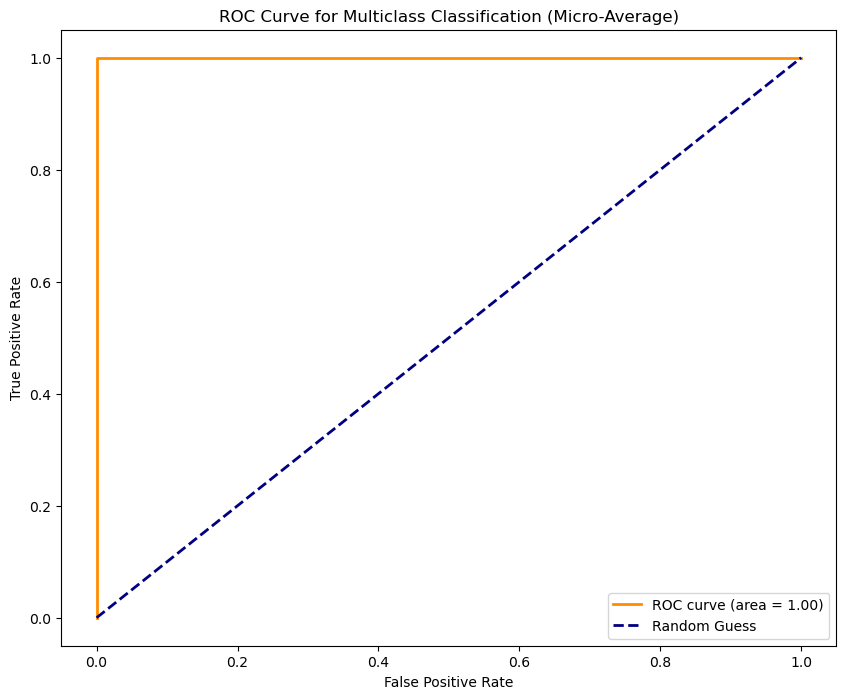

In [53]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the output for ROC computation
y_test_binarized = label_binarize(y_test, classes=np.unique(y))

# Predict probabilities
y_pred_proba = best_rf_model.predict_proba(X_test)

# Compute micro-average ROC curve and ROC area
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification (Micro-Average)')
plt.legend(loc="lower right")
plt.show()


In [54]:
print("Class distribution in training set:")
print(y_train.value_counts())
print("Class distribution in test set:")
print(y_test.value_counts())


Class distribution in training set:
User Behavior Class
2    102
3    100
4     98
5     95
1     95
Name: count, dtype: int64
Class distribution in test set:
User Behavior Class
2    44
3    43
1    41
4    41
5    41
Name: count, dtype: int64


**5. Prediction Distribution**


Distribution of Predictions:
2    44
3    43
1    41
4    41
5    41
Name: count, dtype: int64


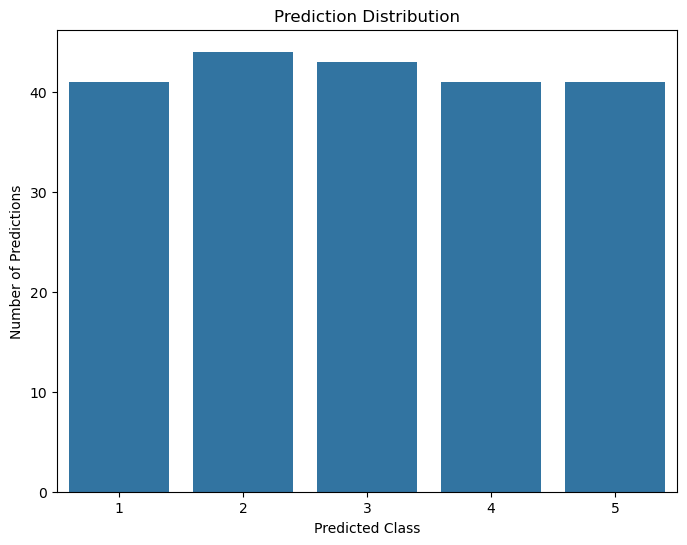

In [56]:
# Analyze the distribution of predictions
print("\nDistribution of Predictions:")
prediction_distribution = pd.Series(y_pred_best_rf).value_counts()  # Count occurrences of each predicted class

print(prediction_distribution)

# Visualize the prediction distribution using a bar plot
plt.figure(figsize=(8, 6))  # Set the figure size for better readability
sns.barplot(
    x=prediction_distribution.index,  # Predicted classes on the x-axis
    y=prediction_distribution.values  # Number of predictions for each class on the y-axis
)
plt.title('Prediction Distribution')
plt.xlabel('Predicted Class')
plt.ylabel('Number of Predictions')
plt.show()


# Goal 3: Identify Factors Influencing High Mobile Usage

High usage threshold (75th percentile): 434.25

High Usage distribution:
High Usage
0    525
1    175
Name: count, dtype: int64

Correlation with App Usage Time (min/day):
App Usage Time (min/day)      1.000000
Screen On Time (hours/day)    0.950333
Battery Drain (mAh/day)       0.956385
Number of Apps Installed      0.955253
Data Usage (MB/day)           0.942308
Age                           0.004382
User Behavior Class           0.970498
App Usage Ratio               0.518809
dtype: float64


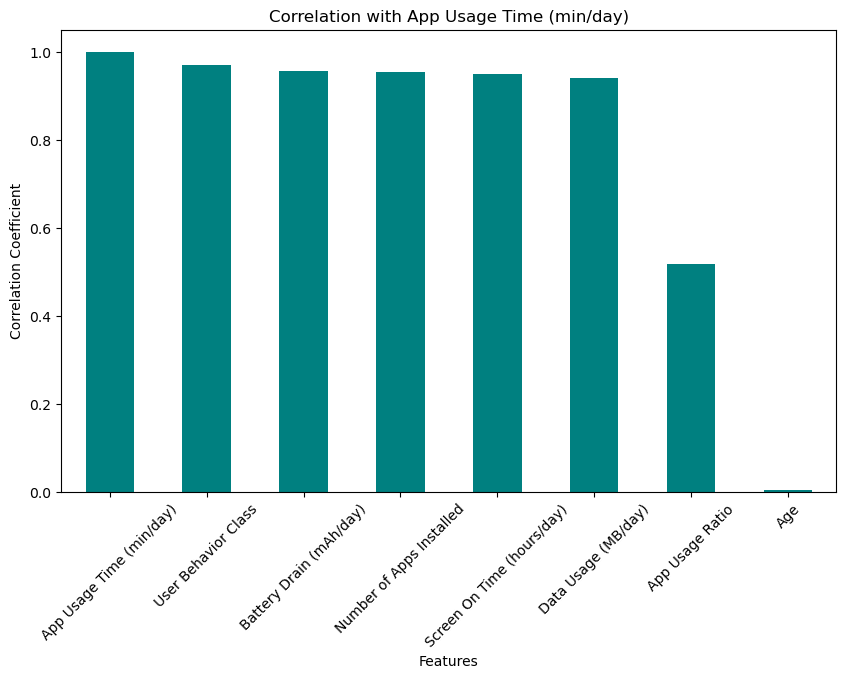

In [58]:
# Define high app usage based on the 75th percentile
usage_threshold = data['App Usage Time (min/day)'].quantile(0.75)  # Calculate the 75th percentile value
data['High Usage'] = (data['App Usage Time (min/day)'] > usage_threshold).astype(int)  # Assign 1 if above threshold, 0 otherwise

# Display the threshold value and the distribution of high usage
print(f"High usage threshold (75th percentile): {usage_threshold}")
print("\nHigh Usage distribution:")
print(data['High Usage'].value_counts())  # Count occurrences of high and low usage

# Correlation Analysis
numeric_cols = data.select_dtypes(include=np.number).drop(columns=['High Usage', 'User ID'])  # Select numeric columns excluding identifiers
correlation_matrix = numeric_cols.corrwith(data['App Usage Time (min/day)'])  # Calculate correlation with 'App Usage Time'

# Display the correlation coefficients
print("\nCorrelation with App Usage Time (min/day):")
print(correlation_matrix)

# Visualize the correlations
plt.figure(figsize=(10, 6))
correlation_matrix.sort_values(ascending=False).plot(kind='bar', color='teal')  # Sort and plot correlations as a bar chart
plt.title('Correlation with App Usage Time (min/day)')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()


Top 10 Important Features Influencing High Mobile Usage:
                       Feature  Importance
3          Data Usage (MB/day)    0.206901
1      Battery Drain (mAh/day)    0.204616
0   Screen On Time (hours/day)    0.182566
2     Number of Apps Installed    0.156607
5          User Behavior Class    0.121167
6              App Usage Ratio    0.090593
4                          Age    0.015490
12                 Gender_Male    0.002983
14             Age Group_36-45    0.002804
15             Age Group_46-55    0.002594


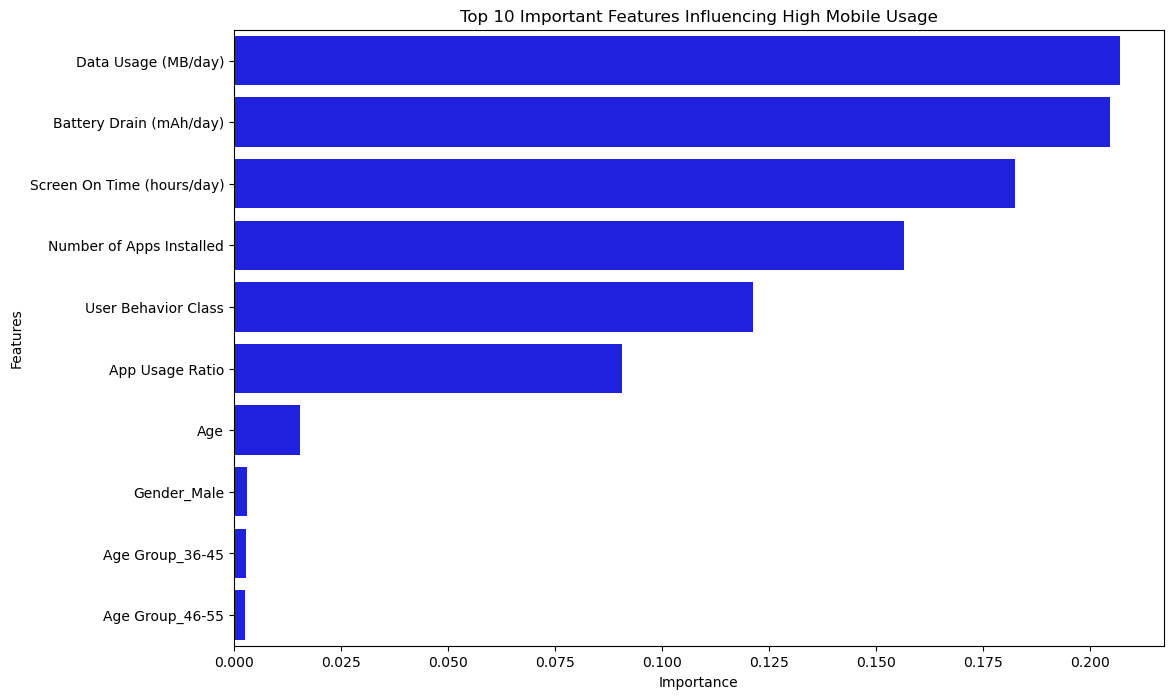

In [59]:
# Identifying Important Features with RandomForest
# Prepare the data for modeling
X = data.drop(columns=['App Usage Time (min/day)', 'High Usage', 'User ID'])  # Exclude target and irrelevant columns
y = data['High Usage']  # Target variable indicating high mobile usage

# Encode categorical variables
categorical_features = X.select_dtypes(include=['object', 'category']).columns  # Identify categorical columns
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)  # One-hot encode categorical variables

# Train a RandomForest Classifier to assess feature importance
rf = RandomForestClassifier(random_state=42)  # Initialize RandomForest with a fixed random state
rf.fit(X, y)  # Fit the model to the data

# Analyze feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,  # Feature names
    'Importance': rf.feature_importances_  # Corresponding importance scores
}).sort_values(by='Importance', ascending=False)  # Sort features by importance in descending order

# Display the top 10 important features
print("\nTop 10 Important Features Influencing High Mobile Usage:")
print(feature_importances.head(10))  # Show the top 10 features

# Visualize the top 10 feature importances
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importances.head(10), x='Importance', y='Feature', color='blue')  # Bar plot of top 10 features
plt.title('Top 10 Important Features Influencing High Mobile Usage')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


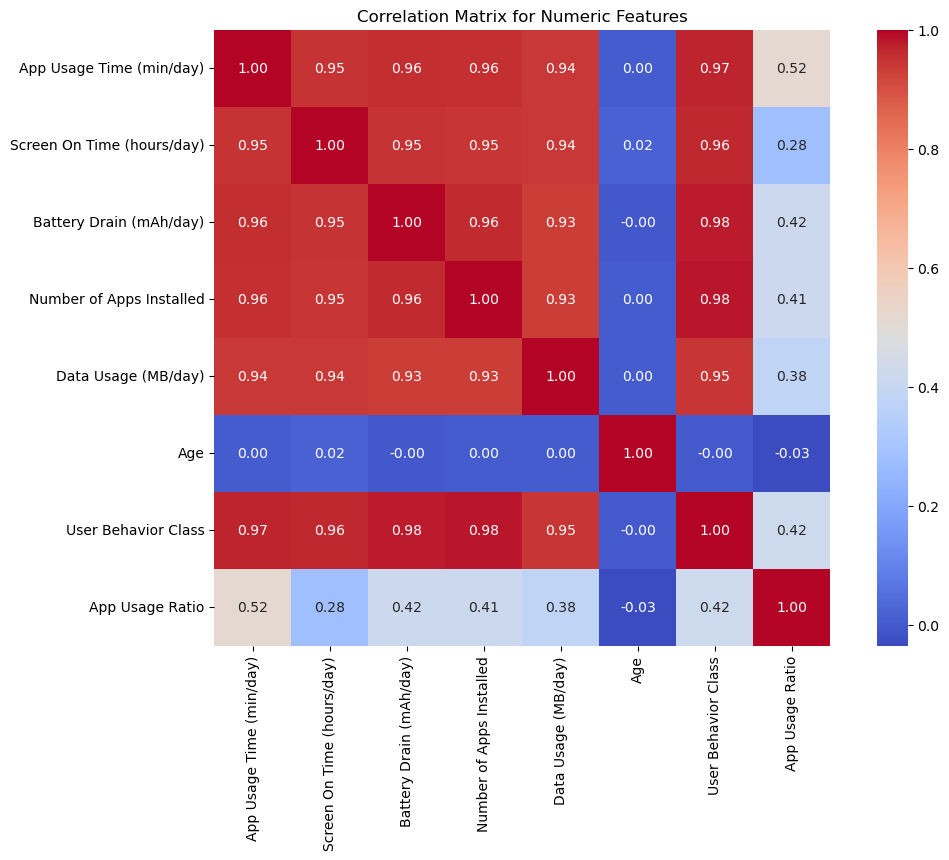

In [60]:
# Correlation Matrix for Numeric Features
# Plot the heatmap of correlations between numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(
    numeric_cols.corr(),  # Compute pairwise correlations for numeric columns
    annot=True,  # Annotate the heatmap with correlation coefficients
    fmt='.2f',  # Format the correlation values to two decimal places
    cmap='coolwarm',  # Use the 'coolwarm' diverging colormap
    square=True  # Make each cell square-shaped
)
plt.title('Correlation Matrix for Numeric Features')
plt.show()
